# 1. Interest in correlations. What impacts total revenue the most?

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12, 8)


In [2]:
df = pd.read_csv('movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df.dropna(subset=['budget','gross'], inplace=True)

In [7]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
df.shape

(5436, 15)

In [9]:
# df['year_correct'] = df['released'].astype(str).str[0:4]

In [15]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(7)

name rating      genre  year  \
5445                                      Avatar  PG-13     Action  2009   
7445                           Avengers: Endgame  PG-13     Action  2019   
3045                                     Titanic  PG-13      Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   

                               released  score      votes         director  \
5445  December 18, 2009 (United States)    7.8  1100000.0    James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0    Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0    James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox    162.0  
7445  2797501328         Marvel Studios    181.0  
3045  2201647264  Twentieth Century Fox    194.0  
6663  2069521700              Lucasfilm    138.0  
7244  2048359754         Marvel Studios    149.0  
7480  1670727580   Walt Disney Pictures    118.0  
6653  1670516444     Universal Pictures    124.0

Text(0, 0.5, 'Gross Earnings')

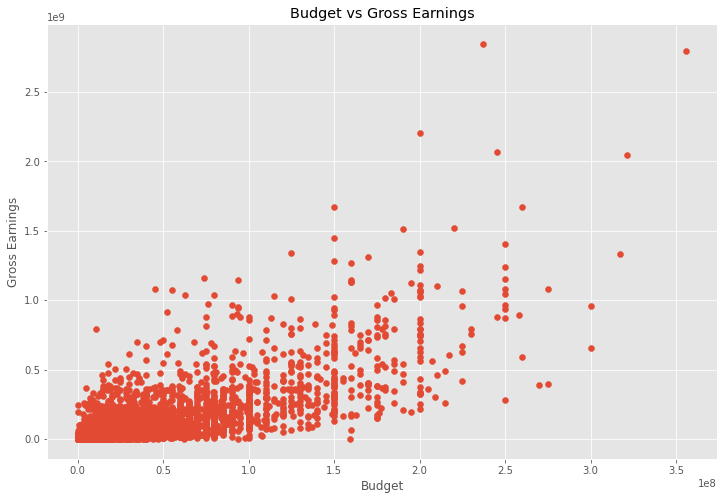

In [22]:
plt.scatter(df.budget, df.gross)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

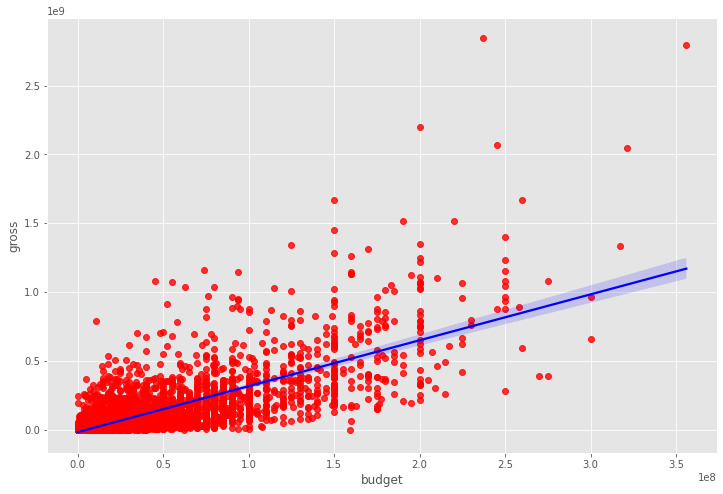

In [24]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'});

In [25]:
df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

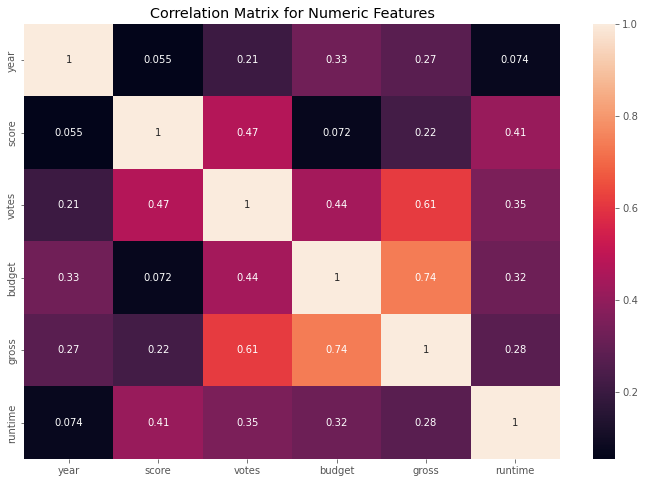

In [32]:
# 'pearson', 'kendall', 'spearman'
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features');

In [34]:
df_numerized = df
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
    

name  rating  genre  year  released  score      votes  director  writer  \
0     4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1     3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2     3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3      205       4      4  1980      1131    7.7   221000.0       891    1416   
4      734       6      4  1980      1174    7.3   108000.0       721     352   
5     1513       6      9  1980      1928    6.4   123000.0      1763    3091   
6     3944       6      0  1980      1363    7.9   188000.0       976     578   
7     3134       6      3  1980       531    8.2   330000.0      1272    1259   
8     3745       4      0  1980      1350    6.8   101000.0      1611    1405   
9     4415       6      3  1980      1760    7.0    10000.0      2017     281   
10     333       4      0  1980       511    6.1    18000.0       238    2819   
11    4193       4      1  1980      2278    7.3    54000.0       819    1302   
12    3041       4      1  1980       472    5.3    30000.0      1648    1662   
13    2871       6      6  1980      2422    7.7    49000.0      1671    1657   
14    1211       6      5  1980      1174    7.1    37000.0       208     351   
15    3566       4      6  1980      2300    7.2    27000.0       849    2514   
17      67       4      4  1980       531    6.9    29000.0       335    2322   
18    4157       6      9  1980       835    6.8    66000.0       945    1489   
20     989       6      5  1980       716    6.5    20000.0      2038    3161   
21    1768       6      1  1980       118    6.8    14000.0      1310    2070   
22    4142       4      0  1980       214    6.7    22000.0       504    2969   
23    5303       4      8  1980       438    5.3    12000.0      1659    2499   
28     702       6      5  1980      1363    7.2    17000.0      1875    3109   
29     262       6      5  1980       669    6.2    22000.0      1492    2365   
33     787       4      6  1980       118    6.1      604.0      1148     675   
35    3080       6      4  1980      2162    6.2    24000.0       746    2213   
36    4259       6      4  1980      1888    6.3     4300.0       583     968   
37    2628       6      4  1980      2263    6.0    11000.0      1118    2585   
42    4750       6      0  1980      1417    7.1     9000.0      1618    1806   
46    4326       6      0  1980      1308    5.3     3900.0      1340    2390   
48    4526       4      0  1980      1928    5.1     3100.0       331    2041   
50    3661       4      4  1980      2482    7.3    22000.0      2049    3194   
51    2506       6      4  1980      2422    6.8     4500.0      1027     304   
53     693       4      0  1980      1293    6.1    11000.0       329     770   
56    5207       4      0  1980      1634    4.6     2600.0       795    1080   
57    2829       4      4  1980      1055    5.4     2400.0       916    2630   
58    4533       6      0  1980       262    5.1     5200.0       553    1823   
75    4365       1      1  1980      1403    5.8     1300.0       269     941   
77    5254       6      4  1980       262    5.9      415.0      1487    1342   
80    2983       6      6  1980      2557    4.0      546.0       971    1016   
92    1980       4      0  1981      1300    8.4   905000.0      1864    1810   
94     285       6      4  1981       315    7.5    97000.0       976    1527   
95    1304       6      0  1981      1044    7.2   131000.0       945    1489   
96    4114       2      9  1981        46    7.5   192000.0      1740    2715   
97    3043       6      4  1981      1573    6.2    40000.0       178     308   
98     604       6      5  1981      1166    7.4    47000.0       208     351   
99     863       4      0  1981      1300    6.9    42000.0       480     278   
100   1332       6      1  1981        11    7.4    59000.0       939    2973   
101   2397       6      0  1981      

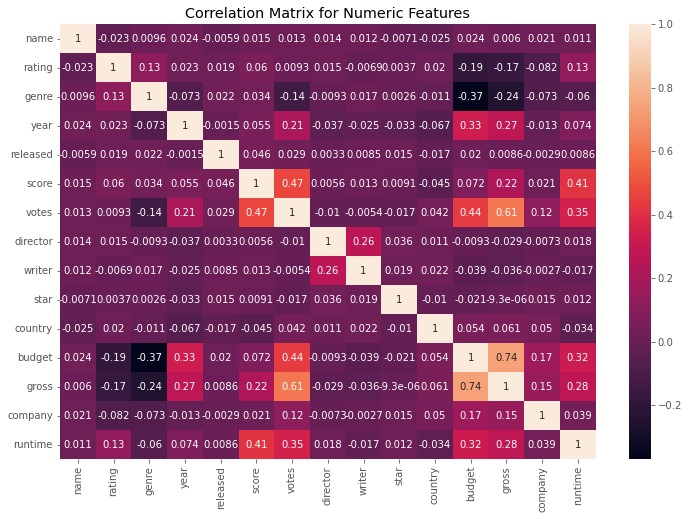

In [35]:
corr_matrix = df_numerized.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features');

In [51]:
c_mat = df_numerized.corr()
corr_pairs = c_mat.unstack()

In [52]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.sample(5)

director  released    0.003341
writer    company    -0.002658
director  name        0.013699
genre     year       -0.073026
rating    released    0.018836
dtype: float64

In [47]:
low_corr = sorted_pairs[(sorted_pairs) < -0.3]
low_corr

genre   budget   -0.3689
budget  genre    -0.3689
dtype: float64

In [48]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64